### This notebook implements an **Agentic RAG (Retrieval-Augmented Generation) system** that can intelligently answer questions by retrieving information from multiple documentation sources. Here's what it actually does:

## Core Purpose
Builds a smart question-answering system that can:
- **Query both LangGraph and LangChain documentation** from separate vector databases
- **Automatically decide** when to retrieve documents vs. answer directly
- **Verify relevance** of retrieved information
- **Rephrase unclear questions** for better retrieval
- **Show its decision-making process** transparently

# Step 1: Import required libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings


USER_AGENT environment variable not set, consider setting it to identify your requests.


# 2.Query both LangGraph and LangChain documentation from separate vector databases

## **2.1** .LangGraph documents with vectorstore 

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [ ]:
urls = [
    "https://docs.langchain.com/oss/python/langgraph/overview",
    "https://docs.langchain.com/oss/python/langgraph/workflows-agents",
    "https://docs.langchain.com/oss/python/langgraph/graph-api#map-reduce-and-the-send-api"
]
docs=[WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main contentWe\'ve raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangGraph v1.0Release notesMigration guideGet startedInstallQuickstartLocal serverThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureStudioTestDeployAgent Chat UIObservabilityLangGraph APIsGraph APIFunctional APIRuntimeOn this page InstallCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overviewCopy pageCopy pageLangGraph v1.0 is now available!For a complete 

## 2.2 **Flattens a list of lists (like [[a, b], [c, d], [e, f]]) into a single list ([a, b, c, d, e, f]).for item in sublist**

In [ ]:
docs_list=[item for sublist in docs for item in sublist]
docs_list

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main contentWe\'ve raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangGraph v1.0Release notesMigration guideGet startedInstallQuickstartLocal serverThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureStudioTestDeployAgent Chat UIObservabilityLangGraph APIsGraph APIFunctional APIRuntimeOn this page InstallCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overviewCopy pageCopy pageLangGraph v1.0 is now available!For a complete l

## 2.3 SPLITTING,STORING,RETRIEVING

In [ ]:

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
)


langGraph_retriever=vectorstore.as_retriever()

C:\Users\Furqan Khan\AppData\Local\Temp\ipykernel_17176\204013143.py:11: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


In [ ]:
langGraph_retriever.invoke("what is langgraph")

[Document(id='ea28009f-8acb-4a4a-b599-361e5088b314', metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content='Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.\nLangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recommend you familiarize yourself with some of the components used to build agents, starting with models and tools.\nWe will commonly use LangChain components throughout the documentation to integrate models and tools, but you don’t need to use LangChain to use LangGraph. If you are just getting started with agents or want a higher-level abstraction, we recommend you use LangChain’s agents that provide pre-built architectures for common LLM and tool-

# 2.4 CREATING RETRIEVER TOOL FOR LANGGRAPH

In [ ]:
from langchain_core.tools import create_retriever_tool
retriever_tool=create_retriever_tool(
    langGraph_retriever,
    "retriever_vector_langGraph",
    "Search and run information about Langgraph")


In [ ]:
retriever_tool

Tool(name='retriever_vector_langGraph', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000020010C4EDD0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000020010BE2D40>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000020010DE1B40>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000020010BE2D40>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_

## **3** .Langchain Blogs- Seperate Vector Store same like langgraph 


In [ ]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]
langchain_docs=[WebBaseLoader(url).load() for url in langchain_urls]
langchain_docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentWe\'ve raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentSupervisor agentLangGraphConceptual overviewsMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and GenerationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent with LangChainCopy pageCopy p

In [ ]:
doc_list=[item for sublist in langchain_docs for item in sublist]
doc_list

[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentWe\'ve raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentSupervisor agentLangGraphConceptual overviewsMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and GenerationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent with LangChainCopy pageCopy pa

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(doc_list)
## Add alll these text to vectordb
vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
)

langchain_retriever=vectorstore.as_retriever()

In [ ]:
# name langchain_retriever_tool
langchain_retriever_tool=create_retriever_tool(
    langchain_retriever,
    "retriever_vector_langchain",
    "Search and run information about Langchain")

langchain_retriever_tool

Tool(name='retriever_vector_langchain', description='Search and run information about Langchain', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000020010C4EDD0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002000F575EA0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000020010DE1B40>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002000F575EA0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_

# 4. Now we have two retriever tools: Make it both to tools so we can call it with agent
- retriever_tool → for LangGraph docs
- langchain_retriever_tool → for LangChain docs

In [ ]:
tools=[retriever_tool,langchain_retriever_tool]

## 5. LangGraph Workflow

# 5.1 load the llm model

In [ ]:
from dotenv import load_dotenv
load_dotenv()
import os
from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

llm=ChatGroq(model="llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002000F192EC0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002000F192DD0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

## 6. AgentState defines what data will move through the graph This keeps track of the conversation history as the workflow progresses.

In [ ]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict): 
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append" means it appends new messages instead of replacing the old ones.
    messages: Annotated[Sequence[BaseMessage],add_messages] 

# 7. This node uses Groq’s Llama model as the agent.
- It takes the user’s current conversation (state["messages"]) and decides what to do:
- Either generate an answer directly, or
- Call a retrieval tool (e.g., a vector DB search).
- The response is added to the message history.

In [ ]:
def agent(state): # state means the current situation of the agent.dictionary holding the current and next function if used data of the workflow.state["messages"] used as messages history storing function predifned in pydantic
    """
    Invokes the agent model(ChatGroq) to generate a response based on the current state. Given
    the question(input), it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state of the agent

    Returns:
        dict: The updated state with the agent response appended to messages list
    """
    print("---CALL groq as AGENT---")
    messages = state["messages"] # Receives the current conversation messages
    model = ChatGroq(model="llama-3.1-8b-instant")
    model = model.bind_tools(tools) #Give agent access to retrieval tools=[retriever_tool,langchain_retriever_tool]
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [ ]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser

from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

# 8. After documents are retrieved, this node checks whether they’re relevant to the user’s question.
- Defines a grade schema — expects 'yes' or 'no'.
- Uses another LLM (ChatGroq) to assess relevance via a prompt.
- If relevant → "generate", else → "rewrite" (to improve the question).
- Example:
If retrieved docs about “LangGraph” contain unrelated info, it’ll tell the system to rewrite the query.
Uses Pydantic to enforce structured output like {"binary_score": "yes"}.


pydantic is python library
Think of Pydantic as a smart data guard standing at your program’s door.
It checks every piece of data that comes in or goes out —
making sure it’s clean, valid, and exactly in the shape you expect.

## 8.1. Every node in your graph (like retriever, agent, or grade_documents) receives this same state object.Each node can read from it or add new messages to it.

In [ ]:
# The function receives state, which holds the messages from the start or current messages in the LangGraph conversation.
def grade_documents(state) -> Literal["generate", "rewrite"]:# Literal is a Python typing feature used to tell what exact values a function can return (or accept).
    print("---CHECK RELEVANCE---")                           # Here it only return one of these two exact strings:

    # Data model
    class grade(BaseModel):# BaseModel means a base (starting) class for defining data structures that automatically check if your data is correct.
        """Binary This defines a Pydantic model (a data structure validator).
        It ensures that when the LLM responds, it must return something like:
        score for relevance check.{"binary_score": "yes"} or {"binary_score": "no"} """

        binary_score: str = Field(description="Relevance score 'yes' or 'no'") # The Field() function adds extra information (metadata) or validation for this field.like description

    # LLM
    model =ChatGroq(model="llama-3.1-8b-instant")

    # LLM with tool and validation 
    llm_with_tool = model.with_structured_output(grade) # Tells the model to always reply using the structure defined in the GRADE CLASS class grade(BaseModel):
                                                        # This ensures the LLM won’t output random sentences — llm will only return structured results or output like: grade model(must have a “binary_score” key yes or no).
    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"], # Look at this question and the provided material(context) Does this material actually help answer the question?”
    )                   # context will hold the document text retrieved earlier.  

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]  
    last_message = messages[-1] #The retrieved documents (messages[-1].content)

    question = messages[0].content #The user’s question (messages[0].content)
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})
                                       # Here the chain runs and the LLM gives its structured output:
    score = scored_result.binary_score # Access the binary_score from the structured output which will be either 'yes' or 'no'.

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

# 9. Generates the final answer using retrieved documents.
- Pulls a predefined RAG prompt (rlm/rag-prompt).
- Uses ChatGroq model to synthesize an answer.
- StrOutputParser() formats the LLM’s output as plain text.
- Returns the new message containing the generated answer.

In [ ]:
# Create a LANGSMITH_API_KEY in Settings > API Keys before creating grade-documents
from langsmith import Client
client = Client(api_key="your_langsmith_api_key")


In [21]:
def generate(state): # So state is a list of messages exchanged so far.
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content # this is the user’s question
    last_message = messages[-1] # this is the retrieved document(s)information we found from the question we asked

    docs = last_message.content # the information we found we store those retrieved documents here
 
    # Prompt
    prompt = client.pull_prompt("rlm/rag-prompt", include_model=True) # ready-made RAG prompt template

    # LLM
    llm=ChatGroq(model="llama-3.1-8b-instant")

    # Post-processing
    def format_docs(docs): # This function takes the retrieved documents and formats them into a single string.
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser() # StrOutputParser ensures the LLM’s output is plain text.

    # Run
    response = rag_chain.invoke({"context": docs, "question": question}) # Here we pass the retrieved documents and the user question to generate the final answer.
    return {"messages": [response]} # Here we return the generated answer as a new message in the state.

# 10. If the retrieved documents were irrelevant, this node rewrites or rephrases the user’s question.
It makes the query clearer or more precise before retrying retrieval.

In [22]:
def rewrite(state): # state again carries the conversation memory (like before).
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"] 
    question = messages[0].content # this is the user’s original question What is Langgraph?

    # prompt if the input question was vague or confusing,this prompt helps the model make it clearer and more specific.
    msg = [HumanMessage(content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="llama-3.1-8b-instant") # This returns the rewritten question as a new state message,
    response = model.invoke(msg)                   # so it can go back into the RAG pipeline —the agent will use this new question to retrieve documents again.
    return {"messages": [response]}

# 11. This defines the workflow (graph) for your agent system — each node is a step in the reasoning process.
- agent → decides whether to call tools or stop.
- retrieve → ToolNode calls external retrievers (like vector DBs).
- rewrite → rephrases bad queries.
- generate → produces final answer.

# Defining Edges (Logic Flow)
- Start from "agent".
- If tools are needed → go to "retrieve".
- If not → end.
Then:
- "retrieve" → checks relevance via grade_documents
- If relevant → "generate"
- If not → "rewrite"
- "rewrite" → loops back to "agent" (try again with improved question).
- "generate" → ends the workflow.

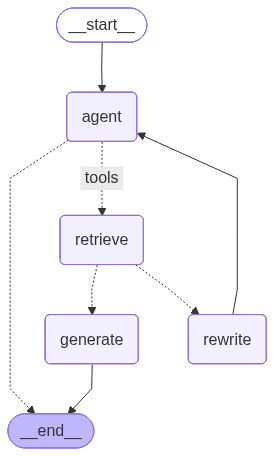

In [23]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# This is the core class for building your workflow or “graph.” You define nodes (steps) and how they connect.
workflow = StateGraph(AgentState) 

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # The decision-maker (like a reasoning model) that decides what to do next (retrieve, rewrite, or finish).
retrieve = ToolNode([retriever_tool,langchain_retriever_tool]) # This node handles document retrieval using multiple retrievers (our own retriever which we stored in vectorstore).
workflow.add_node("retrieve", retrieve)  # retrieve which is our data stored in vectorstore
workflow.add_node("rewrite", rewrite)  # Rephrases the user’s query into a clearer or more precise question.
workflow.add_node("generate", generate)  # Generating a response after we know the documents are relevant

# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent") # The graph starts at the agent node.

# Decide whether to retrieve After the agent decides, it either:Calls the retrieve node (if tools are needed),or ends the workflow (END).
workflow.add_conditional_edges("agent",tools_condition,{"tools": "retrieve",END: END,},)

# Once retrieval happens, grade_documents decides:If documents are relevant → go to generate If not relevant → go to rewrite (to rephrase the query)
workflow.add_conditional_edges("retrieve",grade_documents,)
workflow.add_edge("generate", END) # After generating → workflow ends.
workflow.add_edge("rewrite", "agent") # After rewriting → go back to agent for another decision (a feedback loop).

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [24]:
graph.invoke({"messages":"What is Langgraph?"})

---CALL groq as AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='5aebc6d2-bccd-4abc-9969-7bd16e038d90'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 't4gh3fdkq', 'function': {'arguments': '{"query":"What is Langgraph?"}', 'name': 'retriever_vector_langGraph'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 308, 'total_tokens': 329, 'completion_time': 0.038676706, 'prompt_time': 0.017117465, 'queue_time': 0.053134185, 'total_time': 0.055794171}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--f43e0328-4bc8-40af-9ab6-206716f943b8-0', tool_calls=[{'name': 'retriever_vector_langGraph', 'args': {'query': 'What is Langgraph?'}, 'id': 't4gh3fdkq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 308, 'output_tokens': 21, 'total_tok

In [25]:
graph.invoke({"messages":"What is Langchain?"})

---CALL groq as AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='72787b84-72d1-4cd0-bd68-ef3c956fd7dd'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'jgwz3zmfp', 'function': {'arguments': '{"query":"What is Langchain?"}', 'name': 'retriever_vector_langchain'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 308, 'total_tokens': 329, 'completion_time': 0.028846509, 'prompt_time': 0.016846503, 'queue_time': 0.051338552, 'total_time': 0.045693012}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--b094e23d-7c84-4ccb-ae0a-345a00198e64-0', tool_calls=[{'name': 'retriever_vector_langchain', 'args': {'query': 'What is Langchain?'}, 'id': 'jgwz3zmfp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 308, 'output_tokens': 21, 'total_tok

In [26]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL groq as AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
---CALL groq as AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='5695ba03-3184-4875-93ff-25bdd294ea8f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'znrndhwzh', 'function': {'arguments': '{"query":"What is Machine learning?"}', 'name': 'retriever_vector_langchain'}, 'type': 'function'}, {'id': 'jzan8cp9w', 'function': {'arguments': '{"query":"What is Machine learning?"}', 'name': 'retriever_vector_langGraph'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 308, 'total_tokens': 349, 'completion_time': 0.047200653, 'prompt_time': 0.016869241, 'queue_time': 0.052575899, 'total_time': 0.064069894}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--d778eba4-4b0c-4c98-a38a-75f76e69d22a-0', tool_calls=[{'name': 'retriever_vector_la

| Step | Node                | Purpose                                       |
| ---- | ------------------- | --------------------------------------------- |
| 1️⃣  | **agent**           | Decide whether to retrieve or answer directly |
| 2️⃣  | **retrieve**        | Get relevant documents using tools            |
| 3️⃣  | **grade_documents** | Check if retrieved docs are relevant          |
| 4️⃣  | **generate**        | Generate final answer                         |
| 5️⃣  | **rewrite**         | Rephrase query and loop back if needed        |
